## Filters for locating contours in noisy image

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Filters definitions**

In [23]:
def Grey(img_grey, size):
    print("Grey")
    return img_grey

def FilteringAvg(img_grey, size):
    print("Average filter")
    return cv2.blur(img_grey, (size, size))

def FilteringMedian(img_grey, size):
    print("Median")
    return cv2.medianBlur(img_grey, size)

def FilteringGauss(img_grey, size):
    print("Gauss")
    return cv2.GaussianBlur(img_grey, ksize=(size,size), sigmaX=0)

def FilteringBil(img_grey, size):
    print("Bilinear")
    return cv2.bilateralFilter(img_grey, size, sigmaSpace = 75, sigmaColor =75)

**Original image**

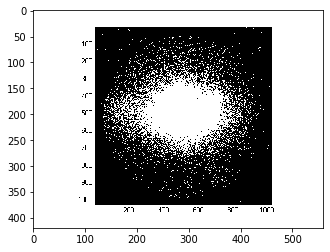

In [24]:
img = cv2.imread('../DATA/noise02.png', 1)
img_grey = cv2.imread('../DATA/noise02.png', 1)
plt.imshow(img)

Grey
Average filter
Median
Gauss
Bilinear


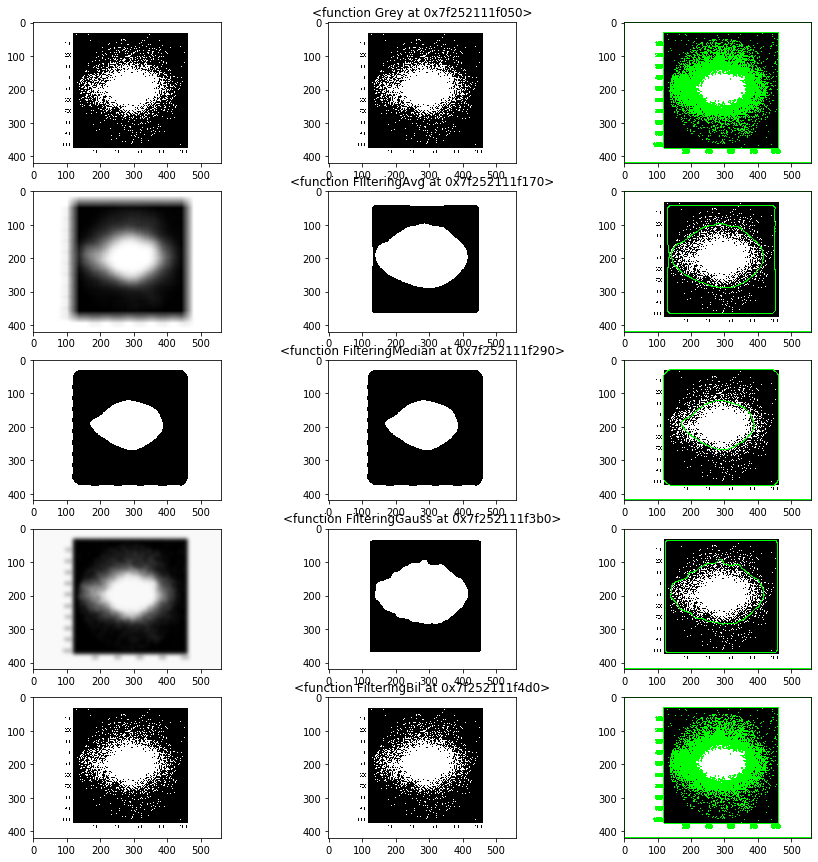

In [29]:
# using dictionary to call alternatively right filter
FuncDict = {
        0: Grey,
        1: FilteringAvg,
        2: FilteringMedian,
        3: FilteringGauss,
        4: FilteringBil,
    }

ksize = 37
images_list = []


# fill images_list list with filtered_images
for index in range(5):
    # use different filter on the image according to dictionary
    filtered_image = FuncDict[index](img_grey, ksize)
    # for some reason, in jupyter I have to convert resulting image to grey again (they have img_grey as input,
    # so they should be greyscale already)
    filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY);
    # list containing all filtered images
    images_list.append(filtered_image)


# threshold and find contours on all filtered images, plot results
fig, axs = plt.subplots(len(images_list), 3, figsize=(15,15))
for index, image in enumerate(images_list):
    # for higher threshold values, it is more selective -> only really white pixels will be activated
    ret, img_thresh = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    img_contoured = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)


    axs[index, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), label='original')
    axs[index, 1].imshow(cv2.cvtColor(img_thresh, cv2.COLOR_BGR2RGB), label='threshold')
    axs[index, 1].title.set_text(str(FuncDict[index]))
    axs[index, 2].imshow(cv2.cvtColor(img_contoured, cv2.COLOR_BGR2RGB), label='contours')
    
plt.show()

Contours are found if image is smoothed with filter  
Results are good with avg/med/gauss filters  
Median filter seems to be better to retain edges (cell 3,1)  